# Neural Network implementation from Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generating dataset

In [2]:
X = np.vstack([(np.random.rand(10,2)*5), (np.random.rand(10,2)*10)])
y = np.hstack([[0]*10, [1]*10])

dataset = pd.DataFrame(X, columns = ('X1', 'X2'))
dataset['Y'] = y

In [3]:
dataset

,X1,X2,Y
0,4.890902,2.845083,0
1,2.571560,3.420440,0
2,0.804232,1.197483,0
3,4.857959,0.134771,0
4,3.521895,4.873451,0
5,3.713257,1.939146,0
6,2.461394,0.661245,0
7,3.336414,4.667681,0
8,2.193311,2.816134,0
9,2.378710,3.186623,0


In [4]:
?np.random.rand

In [5]:
?np.vstack

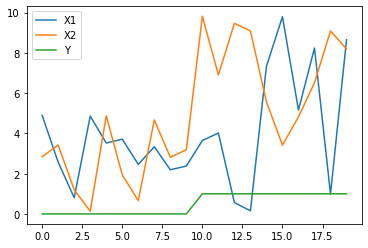

In [6]:
# Plotting the dataset

plt.plot(dataset, label='inline label')
plt.legend(['X1', 'X2', 'Y'])
plt.show()

In [7]:
Z = np.zeros((20,2))
for i in range(20):
    Z[i,y[i]] = 1 
    
"""
ith row and y[i]th column (which is 0 for 1st 10 rows and 1 for other 10),
generating a one hot encoded numpy ndarray
"""
    
Z

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

## Initialising Weights and Biases

creating a 2 layer neural network

Wi_1 and Bi_1 are weights and bias for the first layer
similarly for Wi_2 and Bi_2

In [8]:
Wi_1 = np.random.randn(3,2)
Bi_1 = np.random.randn(3)
Wi_2 = np.random.randn(3,2)
Bi_2 = np.random.randn(2)

# randn generates samples from a normal distribution.
# 3 neurons in 1st layer, 2 neurons in 2nd layer

In [9]:
Wi_1

array([[-0.20730729, -0.11724702],
       [ 1.23068897, -1.76282907],
       [ 0.49375701, -0.47291802]])

In [10]:
Bi_1

array([-0.76610005, -0.25312466,  0.35083569])

In [11]:
Wi_2

array([[1.50246228, 0.79567655],
       [0.29640604, 0.92144732],
       [2.36296423, 0.36563057]])

In [12]:
Bi_2

array([1.82446731, 0.6907432 ])

In [13]:
X

array([[4.8909023 , 2.8450833 ],
       [2.57156041, 3.42044003],
       [0.80423235, 1.1974828 ],
       [4.85795936, 0.13477109],
       [3.52189487, 4.87345073],
       [3.71325686, 1.93914569],
       [2.46139399, 0.66124458],
       [3.33641365, 4.66768141],
       [2.19331097, 2.81613393],
       [2.37870953, 3.18662321],
       [3.64736006, 9.82147996],
       [4.01827645, 6.90862499],
       [0.56481845, 9.46898337],
       [0.15340465, 9.09230193],
       [7.33416552, 5.56556368],
       [9.79859612, 3.41890564],
       [5.16084717, 4.82204978],
       [8.24048272, 6.52046478],
       [0.9860175 , 9.09230411],
       [8.65868714, 8.19242489]])

In [14]:
X.dot(Wi_1.T)
# this would be a step in forward propagation function
# Bias is also added to this, and finally activation function is applied on it.

array([[ -1.34749725,   1.00378395,   1.06942611],
       [ -0.93413962,  -2.86486009,  -0.34786176],
       [ -0.30712452,  -1.1211976 ,  -0.16921584],
       [ -1.02289192,   5.74105861,   2.3349158 ],
       [ -1.30151206,  -4.25670345,  -0.56578241],
       [ -0.99714428,   1.15148186,   0.91638965],
       [ -0.58779388,   1.86354927,   0.90261605],
       [ -1.23893461,  -4.12223701,  -0.56005304],
       [ -0.78487266,  -2.26507914,  -0.24883783],
       [ -0.8667459 ,  -2.69002045,  -0.33250705],
       [ -1.90766357, -12.8248246 ,  -2.84384529],
       [ -1.64303369,  -7.23347647,  -1.28316112],
       [ -1.22730104, -15.99708333,  -4.19916982],
       [ -1.09784718, -15.83938076,  -4.22416883],
       [ -2.17297175,  -0.78506085,   0.98924024],
       [ -2.43217693,   6.03207792,   3.2212634 ],
       [ -1.63525221,  -2.14905186,   0.2677702 ],
       [ -2.47281722,  -1.35299368,   0.98515077],
       [ -1.27045416, -14.81469715,  -3.81306143],
       [ -2.75554638,  -3.78569

# Defining Forward Propagation Function

In [15]:
def forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2):
    # first layer
    M = 1/(1+np.exp(-(X.dot(Wi_1.T) + Bi_1))) # sigmoid function applied.
    # second layer
    A = M.dot(Wi_2) + Bi_2
    expA = np.exp(A)
    Y = expA/expA.sum(axis = 1, keepdims = True) # Softmax function applied.
    return Y, M

In [16]:
forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)

(array([[0.91636173, 0.08363827],
        [0.90172534, 0.09827466],
        [0.90692918, 0.09307082],
        [0.92289389, 0.07710611],
        [0.89071182, 0.10928818],
        [0.91305173, 0.08694827],
        [0.90982885, 0.09017115],
        [0.89133123, 0.10866877],
        [0.90553564, 0.09446436],
        [0.90253991, 0.09746009],
        [0.79114386, 0.20885614],
        [0.85268563, 0.14731437],
        [0.7790521 , 0.2209479 ],
        [0.78061988, 0.21938012],
        [0.93012996, 0.06987004],
        [0.92280518, 0.07719482],
        [0.91972554, 0.08027446],
        [0.93323475, 0.06676525],
        [0.78177348, 0.21822652],
        [0.9241775 , 0.0758225 ]]),
 array([[1.07782243e-01, 6.79322339e-01, 8.05379456e-01],
        [1.54433966e-01, 4.23714674e-02, 5.00743482e-01],
        [2.54790345e-01, 2.01922417e-01, 5.45280565e-01],
        [1.43196356e-01, 9.95880658e-01, 9.36180618e-01],
        [1.12284837e-01, 1.08806598e-02, 4.46469265e-01],
        [1.46384476e-01, 7.1

## Backpropagation by Differentiating or Gradient Descent

In [19]:
# Returns gradient for Weight_2
def diff_Wi_2(H, Z, Y):
    return H.T.dot(Z - Y)

# H = Hidden Layer
# Z = Predicted Values
# Y = Actual values

In [20]:
# returns derivative for both bias

def diff_Wi_1(X,H,Z,output,Wi_2):
    dZ = (Z - output).dot(Wi_2.T)*H*(1-H)
    return X.T.dot(dZ)